## Artifical Intelligence
## submitted To: Muhammad Usman Karim
## submitted by : Haroon Abbas

Instead of uploading the dataset every time, we will mount Google Drive  
and read the dataset directly from there. This makes it persistent across  
Colab sessions.


In [1]:
# Import core libraries
import pandas as pd
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
# Make sure you put the file 'diabetes.csv' in your Google Drive (e.g., MyDrive folder)
file_path = "/content/drive/MyDrive/diabetes.csv"
data = pd.read_csv(file_path)

# Show first 5 rows
print("First 5 rows of the dataset:")
print(data.head())


Mounted at /content/drive
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Step 2: Data Exploration and Preprocessing

In this step, we will:
1. Explore the dataset (shape, info, statistical summary).
2. Check for invalid values (like zeros in Glucose, BloodPressure, etc.).
3. Handle missing/invalid values by replacing them with column medians.
4. Visualize the data (distribution and correlations).
5. Split the dataset into training and test sets.
6. Standardize (scale) the features for neural network training.



Shape of dataset: (768, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistical summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  12

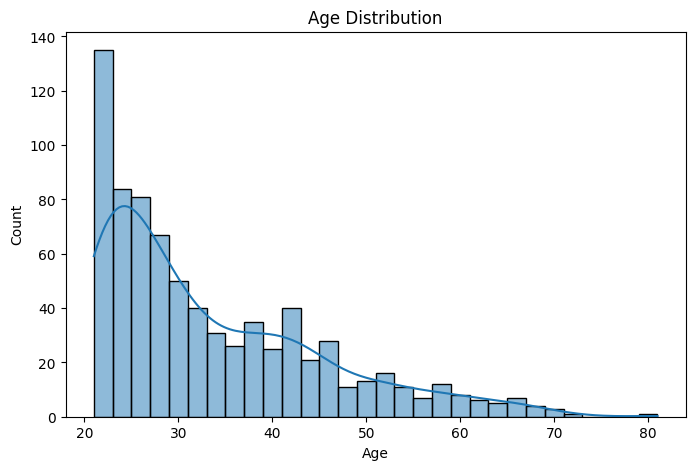

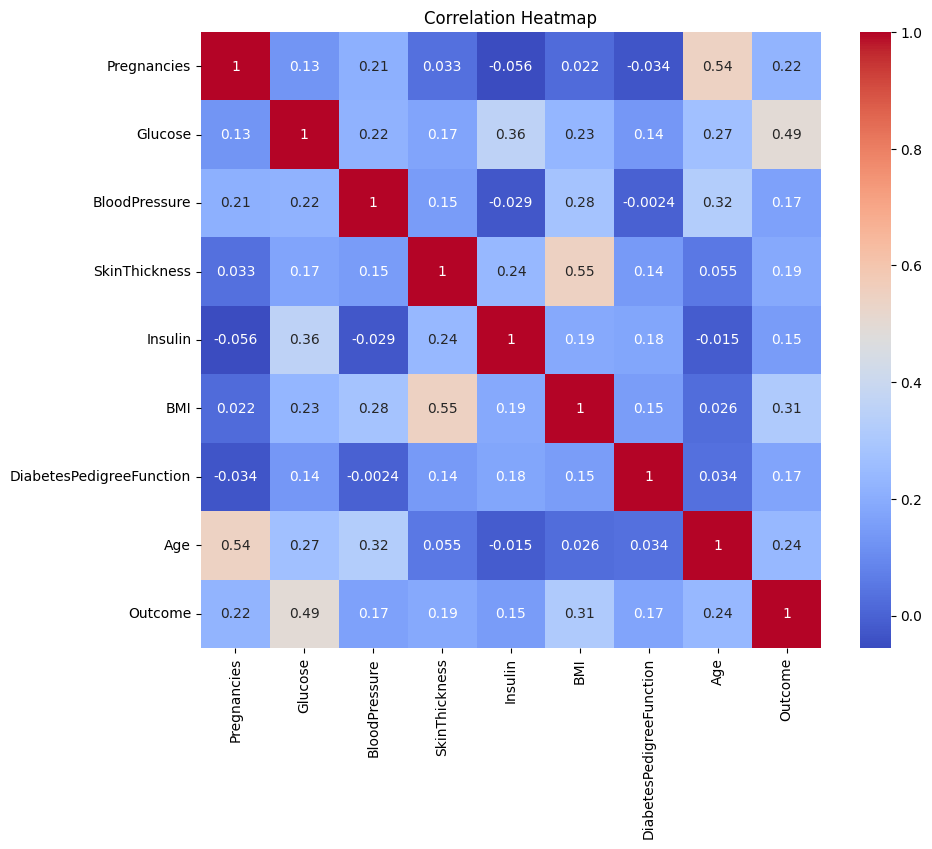


Training set shape: (614, 8)
Test set shape: (154, 8)

Scaling done. Example scaled row: [-0.85135507 -1.05642747 -0.82674004 -1.6493221  -0.5122797  -0.76881064
  0.31079384 -0.79216928]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Explore the dataset
print("Shape of dataset:", data.shape)
print("\nData info:")
print(data.info())
print("\nStatistical summary:")
print(data.describe())

# 2. Check for zeros in key columns
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\nNumber of zeros in each column:")
print((data[cols_with_zeros] == 0).sum())

# 3. Replace zeros with column median
for col in cols_with_zeros:
    median_value = data[col].median()
    data[col] = data[col].replace(0, median_value)

print("\nAfter replacing zeros:")
print((data[cols_with_zeros] == 0).sum())

# 4. Visualization
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Split data into features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 6. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling done. Example scaled row:", X_train_scaled[0])


In this step, we will design a Feedforward Neural Network (FNN) using tf.keras.Sequential.

The input layer will take our 8 features.

We will add 1–2 hidden layers with the ReLU activation.

The output layer will have 1 neuron with sigmoid activation (since it’s binary classification).

We will compile the model with:

Optimizer: Adam

Loss: Binary Crossentropy

Metric: Accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 3: Build the model
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),  # input + first hidden layer
    Dense(8, activation='relu'),  # second hidden layer
    Dense(1, activation='sigmoid')  # output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


Step 4.1 – Training the Neural Network
Now we will train the neural network using the training set.

We will train for 100 epochs (iterations over the dataset).

We will use a validation split of 20% from the training data to check the model’s performance during training.

Training history (loss & accuracy) will be stored so we can plot and analyze it later.

In [ ]:
# Step 4.1: Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight={0:1, 1:2},   # Give more weight to Diabetes class
    verbose=1
)


Step 4.2 – Plot Accuracy & Loss Curves

To understand how our model trained, we will plot accuracy and loss for both the training set and the validation set across all epochs.

If both training and validation accuracy go up steadily → the model is learning well.

If training accuracy goes up but validation accuracy goes down → the model is overfitting.

If both curves are flat → the model is not learning enough

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Step 4.3: Model Evaluation and Prediction

Now that we have trained the model, let’s evaluate its performance on the test dataset and generate predictions.
We will check the test accuracy, then visualize the performance using a confusion matrix and a classification report.

In [ ]:
# Step 4.3: Model Evaluation and Prediction

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Diabetes","Diabetes"]))
